<a href="https://colab.research.google.com/github/DavidPu/colab/blob/master/tree_new_bee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install graphviz

In [0]:
from IPython.display import Image
from graphviz import Digraph



class Node(object):
  # global Node id for graphviz node.
  __gid__ = 0
  def __init__(self, v, l_node=None, r_node=None):
    self.value = v
    self.left = l_node
    self.right = r_node
    self._gid = 'node_' + str(Node.__gid__)
    Node.__gid__ += 1
    


# https://en.wikipedia.org/wiki/Binary_tree
class BinaryTree(object):
  def __init__(self, root=None, tree_dict=None):
      self.root = root
      if isinstance(tree_dict, dict):
        self.create_tree(tree_dict, 0)
  
  def create_tree(self, tree_dict, root=None, level=0):
    if not tree_dict:
      return

    children = [k for k in tree_dict.keys()]
    # print(' ' * level*2, children)
    assert len(children) <= 2, "not a binary tree"
    if not children:
      return
    
    if children[0]:
      left = Node(children[0])
      if not root:
        self.root = left
        root = self.root
      else:
        root.left = left

      sub_dict = tree_dict[children[0]]
      self.create_tree(sub_dict, left, level + 1)
    else:
      root.left = None

    
    if len(children) < 2:
      return
    
    right = Node(children[1])

    root.right = right
    sub_dict = tree_dict[children[1]]
    self.create_tree(sub_dict, right, level + 1)
    
    return
      

  def invisible_node(self, dot, parent):
      invis_node = '#' + parent._gid
      dot.node(invis_node, group=parent._gid, style='invis')
      dot.edge(parent._gid, invis_node, style='invis')
      

  # graphviz Binary tree pretty render:
  # https://blog.nanpuyue.com/2019/054.html
  # https://www.bbsmax.com/A/QV5Zjj475y/  
  def BFS(self, dot, root=None):
    parent = root or self.root
    
    if not parent:
      return
    
    dot.node(parent._gid, label=str(parent.value), group=parent._gid)
    if parent.left:
      self.BFS(dot, parent.left)
      dot.edge(parent._gid, parent.left._gid)
      self.invisible_node(dot, parent)
      
    if parent.right:
      if not parent.left:
        self.invisible_node(dot, parent)
        
      self.BFS(dot, parent.right)
      dot.edge(parent._gid, parent.right._gid)
      

  def display(self):
    dot = Digraph(comment='BinaryTree')
    # dot.attr(nodesep="0.1")
    self.BFS(dot)
    return dot








In [0]:
# dict literals are ordered: https://mail.python.org/pipermail/python-dev/2017-December/151283.html
tree_data = {
    2: {
     7: {
         2: None,
         6: {
             5: {
                7: None,
             },
             11: {
                 22: {
                     None:None,
                     9: {
                         1: {
                             100: None
                         }
                     }
                 }
             }
         }
     },
     
     5: {
         100: {
             1000: {0: None}
         },
         9: {
             4: {
                 100: {
                     None: None,
                     88: {
                         1: {
                             None:None,
                             'HAHAH':None
                         }
                     }
                 }
             }
         }
     }
    }
}

tree = BinaryTree(tree_dict=tree_data)
tree.display()


In [0]:
tree_data2 = {
    'A': {
        'B': {
            'C': {
                'D': None,
                'E': None,
            },
            'F': None,
        },
        'G': {
            'H': {
                None:None,
                'I':None,
            }
        }
    }
}


t = BinaryTree(tree_dict=tree_data2)
t.display()

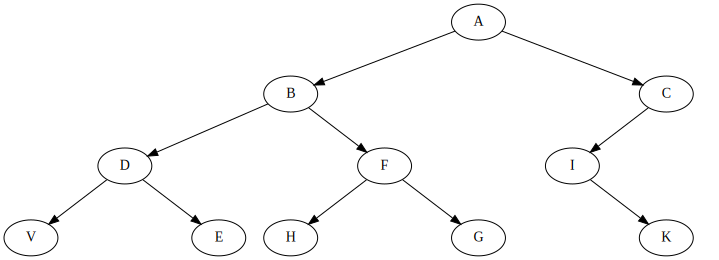

In [0]:
tree_root = Node('A',
                 Node('B',
                     Node('D',
                          Node('V'),
                          Node('E')
                         ),
                      Node('F',
                          Node('H'),
                          Node('G')
                          )
                     ),
                 Node('C',
                     Node('I',
                          None,
                          Node('K')
                         )
                     )
                )

t = BinaryTree(root=tree_root)
t.display()

In [0]:
from graphviz import Digraph
from graphviz import Source

s = Source(open('mytree.dot', 'r').read())
s
